In [22]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [23]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree, ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
x = diabetes.data
y = diabetes.target
feature = diabetes.feature_names
x,y,feature

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [5]:
x.shape,y.shape,feature

((442, 10),
 (442,),
 ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [14]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
x_regu = StandardScaler().fit(x).transform(x)
x_regu,x_regu.shape

(array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
          0.41855058, -0.37098854],
        [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
         -1.43655059, -1.93847913],
        [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
          0.06020733, -0.54515416],
        ...,
        [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
         -0.98558469,  0.32567395],
        [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
          0.93615545, -0.54515416],
        [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
         -0.08871747,  0.06442552]]),
 (442, 10))

In [27]:
# 랜덤 회귀모델

model = ensemble.RandomForestRegressor() # mean square error를 기본

In [30]:
# 정규화하지 않은 모델 model1
model1 = model.fit(x, y)

In [42]:
# 정규화한 않은 모델 model2
model2 = model.fit(x_regu, y)

In [31]:
model1.predict(x)

array([176.2 ,  81.92, 143.98, 194.91, 118.3 , 100.77, 117.67, 110.89,
       122.23, 235.17, 108.85, 101.57, 142.65, 183.44, 114.07, 178.35,
       184.66, 158.41, 103.17, 140.39,  84.29,  68.99,  84.37, 245.75,
       175.04, 182.18, 122.07, 109.12, 135.89, 247.56, 134.3 ,  63.7 ,
       312.57,  95.94,  71.96, 112.17, 255.33, 219.06, 246.15, 123.19,
       123.91,  81.46,  87.17,  91.74, 232.11,  72.77, 166.02, 136.65,
        77.07, 157.32, 135.13, 197.9 ,  77.39, 115.48, 167.28, 110.21,
       101.47,  49.87, 150.78, 159.3 ,  73.62, 150.9 ,  55.33, 121.87,
       105.63, 171.1 , 141.69,  97.06, 132.77, 143.1 ,  59.83, 270.91,
       188.06, 107.7 , 109.72,  80.1 , 170.79, 154.4 , 220.89, 122.3 ,
       157.98,  83.39,  64.61, 186.6 ,  71.36, 141.63,  71.59, 156.58,
        62.14, 103.58,  90.5 , 161.55,  84.31,  85.84,  91.74, 143.83,
       172.15, 259.73,  97.37,  99.63, 161.03,  97.45, 259.84, 183.04,
       107.28,  71.48, 128.96, 139.04, 225.97, 109.48,  99.16,  73.44,
      

In [43]:
model2.predict(x_regu)

array([180.74,  78.6 , 138.19, 192.28, 119.62, 106.76, 116.93,  95.16,
       128.59, 263.15, 107.54, 101.35, 150.51, 182.12, 112.85, 176.87,
       186.81, 162.18, 103.2 , 137.05,  89.79,  75.37,  81.97, 245.55,
       163.92, 185.66, 126.69, 111.44, 131.38, 252.68, 139.51,  63.38,
       314.05,  91.58,  73.9 , 109.22, 245.8 , 231.57, 249.16, 121.79,
       128.96,  86.  ,  86.15,  90.14, 228.07,  71.88, 169.68, 137.78,
        78.08, 152.14, 145.74, 210.2 ,  77.03, 106.02, 172.27,  99.03,
       101.03,  65.16, 159.82, 159.83,  76.89, 148.53,  53.57, 122.9 ,
        97.8 , 159.33, 146.32,  99.53, 130.95, 143.58,  60.64, 260.72,
       193.85, 112.19, 125.49,  69.09, 174.13, 162.11, 223.61, 115.25,
       160.11,  74.83,  63.12, 184.95,  74.17, 148.38,  68.7 , 158.9 ,
        62.97, 101.98,  91.95, 159.57,  89.95,  86.27,  94.96, 145.87,
       170.7 , 248.71,  94.88, 107.32, 162.89,  99.67, 261.87, 182.12,
       116.87,  67.85, 125.53, 138.65, 229.21, 101.01,  98.12,  81.95,
      

In [32]:
# 비정규화 결정계수 표시
model1.score(x,y)
# 92% 설명력

0.920149365391788

In [46]:
# 정규화 결정계수 표시
model1.score(x_regu,y)
# 92% 설명력

0.920930377552683

In [33]:
r2 = model1.score(x,y)
print('결정계수: ',r2)

결정계수:  0.920149365391788


In [34]:
# 예측
model1.predict(x)

array([176.2 ,  81.92, 143.98, 194.91, 118.3 , 100.77, 117.67, 110.89,
       122.23, 235.17, 108.85, 101.57, 142.65, 183.44, 114.07, 178.35,
       184.66, 158.41, 103.17, 140.39,  84.29,  68.99,  84.37, 245.75,
       175.04, 182.18, 122.07, 109.12, 135.89, 247.56, 134.3 ,  63.7 ,
       312.57,  95.94,  71.96, 112.17, 255.33, 219.06, 246.15, 123.19,
       123.91,  81.46,  87.17,  91.74, 232.11,  72.77, 166.02, 136.65,
        77.07, 157.32, 135.13, 197.9 ,  77.39, 115.48, 167.28, 110.21,
       101.47,  49.87, 150.78, 159.3 ,  73.62, 150.9 ,  55.33, 121.87,
       105.63, 171.1 , 141.69,  97.06, 132.77, 143.1 ,  59.83, 270.91,
       188.06, 107.7 , 109.72,  80.1 , 170.79, 154.4 , 220.89, 122.3 ,
       157.98,  83.39,  64.61, 186.6 ,  71.36, 141.63,  71.59, 156.58,
        62.14, 103.58,  90.5 , 161.55,  84.31,  85.84,  91.74, 143.83,
       172.15, 259.73,  97.37,  99.63, 161.03,  97.45, 259.84, 183.04,
       107.28,  71.48, 128.96, 139.04, 225.97, 109.48,  99.16,  73.44,
      

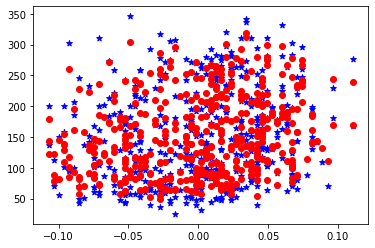

In [38]:
# 그래프 표시 - age

plt.scatter(x[:,0],y,marker = '*',c ='blue')
plt.scatter(x[:,0],model1.predict(x),marker = 'o',c='red')
plt.show()

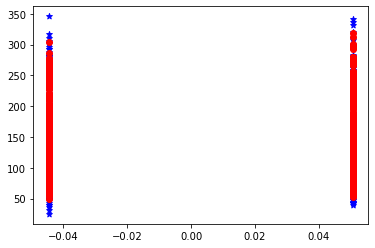

In [39]:
# 그래프 표시 - sex

plt.scatter(x[:,1],y,marker = '*',c ='blue')
plt.scatter(x[:,1],model1.predict(x),marker = 'o',c='red')
plt.show()

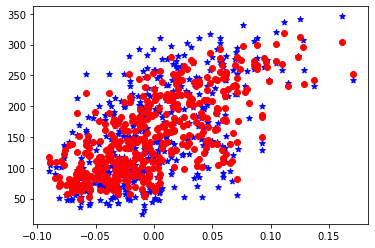

In [40]:
# 그래프 표시 - bmi

plt.scatter(x[:,2],y,marker = '*',c ='blue')
plt.scatter(x[:,2],model1.predict(x),marker = 'o',c='red')
plt.show()